In [1]:
!pip install matplotlib seaborn
##Importaciones necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importar funciones personalizadas
target_path = "../src/"
import sys
sys.path.append(target_path)

import sp_limpieza 
import sp_eda
import sp_visualizacion

# Importar las funciones del archivo 'sp_limpieza.py' y sp_eda.py' en 'src'
from sp_eda import calcular_nulos
from sp_eda import calcular_porcentaje_nulos
from sp_eda import analisis_general_cat
from sp_visualizacion import graficar_categoricas
from sp_limpieza import rellenar_nulos_categoricas






[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df_limpio = pd.read_csv("../data/bank_limpio.csv")  # Ajusta la ruta según tu estructura
display(df_limpio.head())

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,id_,year,month,day
0,NaN,housemaid,married,basic,0.0,0.0,0.0,telephone,261,1,999,0,1.1,93994.0,-364.0,4857.0,5191.0,0,089b39d8-e4d0-461b-87d4-814d71e0e079,0,0,0
1,57.0,services,married,high.school,NaN,0.0,0.0,telephone,149,1,999,0,1.1,93994.0,-364.0,NaN,5191.0,0,e9d37224-cb6f-4942-98d7-46672963d097,0,0,0
2,37.0,services,married,high.school,0.0,1.0,0.0,telephone,226,1,999,0,1.1,93994.0,-364.0,4857.0,5191.0,0,3f9f49b5-e410-4948-bf6e-f9244f04918b,0,0,0
3,40.0,admin.,married,basic,0.0,0.0,0.0,telephone,151,1,999,0,1.1,93994.0,-364.0,NaN,5191.0,0,9991fafb-4447-451a-8be2-b0df6098d13e,0,0,0
4,56.0,services,married,high.school,0.0,0.0,1.0,telephone,307,1,999,0,1.1,93994.0,-364.0,NaN,5191.0,0,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,0,0,0


In [3]:
calcular_porcentaje_nulos(df_limpio)

age               11.906977
job                0.000000
marital            0.000000
education          0.000000
default           20.886047
housing            2.386047
loan               2.386047
contact            0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
emp_var_rate       0.000000
cons_price_idx     1.095349
cons_conf_idx      0.000000
euribor3m         21.525581
nr_employed        0.000000
y                  0.000000
id_                0.000000
year               0.000000
month              0.000000
day                0.000000
dtype: float64

In [4]:
numero_nulos_df_limpio, porcentaje_nulos_df_limpio = sp_eda.calcular_nulos(df_limpio)
numero_nulos_df_limpio

age               5120
job                  0
marital              0
education            0
default           8981
housing           1026
loan              1026
contact              0
duration             0
campaign             0
pdays                0
previous             0
emp_var_rate         0
cons_price_idx     471
cons_conf_idx        0
euribor3m         9256
nr_employed          0
y                    0
id_                  0
year                 0
month                0
day                  0
dtype: int64

In [5]:
# analisis y gestion de nulos de las categoricas
# visualizacion de columnas catagoricas
col_catg = df_limpio.select_dtypes(include='O').columns
col_catg

Index(['job', 'marital', 'education', 'contact', 'id_'], dtype='object')

In [6]:
# revisamos valores unicos
df_limpio['job'].unique()


array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [7]:
#cuantos tengo por cada valor
df_limpio['job'].value_counts(normalize=True)

job
admin.           0.252860
blue-collar      0.224512
technician       0.163395
services         0.096791
management       0.070930
retired          0.041628
entrepreneur     0.035395
self-employed    0.034628
housemaid        0.026116
unemployed       0.024721
student          0.021000
unknown          0.008023
Name: proportion, dtype: float64

In [8]:
#valores descrptivos
df_limpio['job'].describe()

count      43000
unique        12
top       admin.
freq       10873
Name: job, dtype: object

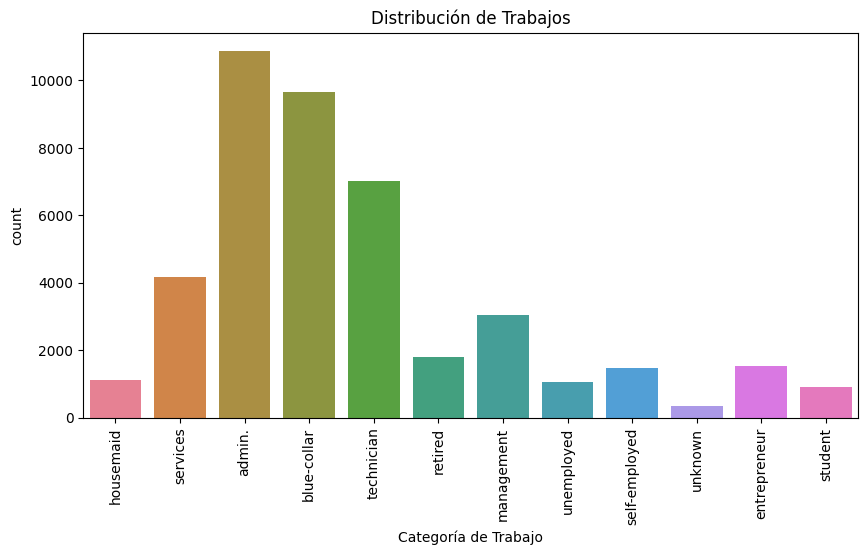

In [9]:
# creamos grafico de esta columna
plt.figure(figsize=(10, 5))
sns.countplot(data=df_limpio, x="job", hue='job'); # podemos poner loque queramos en hue y nos saca datos para comparar
plt.title("Distribución de Trabajos")  # Título
plt.xlabel("Categoría de Trabajo")  # Etiqueta del eje X
plt.xticks(rotation=90)  # Rotar etiquetas del eje X
plt.show()



In [10]:
analisis_general_cat(df_limpio)



--- Análisis de la columna: JOB ---
📌 La columna tiene 12 valores únicos.



job
admin.           0.252860
blue-collar      0.224512
technician       0.163395
services         0.096791
management       0.070930
retired          0.041628
entrepreneur     0.035395
self-employed    0.034628
housemaid        0.026116
unemployed       0.024721
student          0.021000
unknown          0.008023
Name: proportion, dtype: float64

count      43000
unique        12
top       admin.
freq       10873
Name: job, dtype: object


------------------------------------

--- Análisis de la columna: MARITAL ---
📌 La columna tiene 4 valores únicos.



marital
married     0.604628
single      0.281512
divorced    0.111884
unknown     0.001977
Name: proportion, dtype: float64

count       43000
unique          4
top       married
freq        25999
Name: marital, dtype: object


------------------------------------

--- Análisis de la columna: EDUCATION ---
📌 La columna tiene 6 valores únicos.



education
basic                  0.303512
university.degree      0.295860
high.school            0.230814
professional.course    0.127372
unknown                0.042023
illiterate             0.000419
Name: proportion, dtype: float64

count     43000
unique        6
top       basic
freq      13051
Name: education, dtype: object


------------------------------------

--- Análisis de la columna: CONTACT ---
📌 La columna tiene 2 valores únicos.



contact
cellular     0.637116
telephone    0.362884
Name: proportion, dtype: float64

count        43000
unique           2
top       cellular
freq         27396
Name: contact, dtype: object


------------------------------------

--- Análisis de la columna: ID_ ---
📌 La columna tiene 43000 valores únicos.



id_
089b39d8-e4d0-461b-87d4-814d71e0e079    0.000023
c25b5d31-bb7e-41af-898d-42bf3e479351    0.000023
bfd6bad9-f23a-445a-838e-10ee90110534    0.000023
075b0e72-b5e3-43f4-90cd-29f9090b2b1a    0.000023
482a2d86-c9f0-46b7-9f6f-82c769690d48    0.000023
                                          ...   
27e317a2-722c-454d-850b-97b536029c81    0.000023
6d9c117f-af67-4a89-83db-caf514a42374    0.000023
6a229b87-6bf9-4339-9639-b98555df71e7    0.000023
cc891cf7-206c-47f0-804f-20b5b757d5fc    0.000023
993bbbd6-4dbc-4a40-a408-f91f8462bee6    0.000023
Name: proportion, Length: 43000, dtype: float64

count                                    43000
unique                                   43000
top       089b39d8-e4d0-461b-87d4-814d71e0e079
freq                                         1
Name: id_, dtype: object


------------------------------------

📊 **Resumen Estadístico General:**


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,37880.0,NaN,NaN,NaN,39.977112,10.437957,17.0,32.0,38.0,47.0,98.0
job,43000,12,admin.,10873,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,43000,4,married,25999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,43000,6,basic,13051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,34019.0,NaN,NaN,NaN,0.000088,0.00939,0.0,0.0,0.0,0.0,1.0
housing,41974.0,NaN,NaN,NaN,0.535998,0.498708,0.0,0.0,1.0,1.0,1.0
loan,41974.0,NaN,NaN,NaN,0.15562,0.362499,0.0,0.0,0.0,0.0,1.0
contact,43000,2,cellular,27396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,43000.0,NaN,NaN,NaN,257.739279,258.666033,0.0,102.0,179.0,319.0,4918.0
campaign,43000.0,NaN,NaN,NaN,2.567233,2.772294,1.0,1.0,2.0,3.0,56.0


In [11]:
print(df_limpio.columns)  # Verifica las columnas disponibles


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'id_', 'year', 'month', 'day'],
      dtype='object')


In [12]:
df_limpio = rellenar_nulos_categoricas(df_limpio, ['job', 'marital', 'education'])

print(df_limpio[['job', 'marital', 'education']].isnull().sum())  # Debería mostrar todo en 0

job          0
marital      0
education    0
dtype: int64


In [13]:
# poutcome tiene un porcentaje muy alto de nulos (86%), vamos a hacer un gráfico 
# para ver su relación con "y" y decidir si la mantenemos o eliminamos.

# Creamos una tabla de frecuencias cruzadas
tabla_frecuencia = pd.crosstab(df_limpio['poutcome'], df_limpio['y'], normalize='index')
print(tabla_frecuencia)

KeyError: 'poutcome'

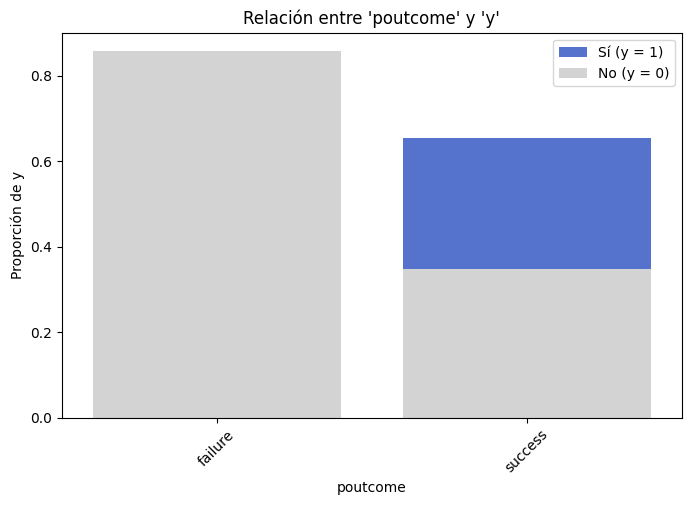

In [85]:
# Configurar el tamaño de la figura para la visualización
plt.figure(figsize=(8,5))  
# Crear un gráfico de barras para visualizar la relación entre 'poutcome' y 'y'
# Representamos la proporción de clientes que aceptaron la oferta (y = 1)
sns.barplot(x=tabla_frecuencia.index, y=tabla_frecuencia[1], color='royalblue', label="Sí (y = 1)")
# Superponemos otra barra en el gráfico con la proporción de clientes que no aceptaron la oferta (y = 0)
sns.barplot(x=tabla_frecuencia.index, y=tabla_frecuencia[0], color='lightgrey', label="No (y = 0)")
# Agregar la leyenda para diferenciar ambas categorías
plt.legend()
# Título del gráfico para indicar qué relación se está visualizando
plt.title("Relación entre 'poutcome' y 'y'")
# Etiqueta del eje X para indicar qué variable se representa
plt.xlabel("poutcome")
# Etiqueta del eje Y para indicar la proporción de clientes en cada categoría de 'y'
plt.ylabel("Proporción de y")
# Rotar las etiquetas del eje X para mejorar la legibilidad
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.show()


In [86]:
df_limpio.drop(columns=['poutcome'], inplace=True, errors='ignore')

In [87]:
print("Columnas después de eliminar 'poutcome':", df_limpio.columns)

# Revisar las primeras filas para verificar que todo está correcto
df_limpio.head()


Columnas después de eliminar 'poutcome': Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'id_', 'year', 'month', 'day'],
      dtype='object')


,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,id_,year,month,day
0,NaN,housemaid,married,basic,0.0,0.0,0.0,telephone,261,1,999,0,1.1,93994.0,-364.0,4857.0,5191.0,0,089b39d8-e4d0-461b-87d4-814d71e0e079,0,0,0
1,57.0,services,married,high.school,NaN,0.0,0.0,telephone,149,1,999,0,1.1,93994.0,-364.0,NaN,5191.0,0,e9d37224-cb6f-4942-98d7-46672963d097,0,0,0
2,37.0,services,married,high.school,0.0,1.0,0.0,telephone,226,1,999,0,1.1,93994.0,-364.0,4857.0,5191.0,0,3f9f49b5-e410-4948-bf6e-f9244f04918b,0,0,0
3,40.0,admin.,married,basic,0.0,0.0,0.0,telephone,151,1,999,0,1.1,93994.0,-364.0,NaN,5191.0,0,9991fafb-4447-451a-8be2-b0df6098d13e,0,0,0
4,56.0,services,married,high.school,0.0,0.0,1.0,telephone,307,1,999,0,1.1,93994.0,-364.0,NaN,5191.0,0,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,0,0,0


In [88]:
# Sobreescribimos el archivo existente en lugar de crear uno nuevo
df_limpio.to_csv("../data/bank_limpio.csv", index=False)


In [89]:
analisis_general_cat(df_limpio)



--- Análisis de la columna: JOB ---
📌 La columna tiene 12 valores únicos.



job
admin.           0.252860
blue-collar      0.224512
technician       0.163395
services         0.096791
management       0.070930
retired          0.041628
entrepreneur     0.035395
self-employed    0.034628
housemaid        0.026116
unemployed       0.024721
student          0.021000
unknown          0.008023
Name: proportion, dtype: float64

count      43000
unique        12
top       admin.
freq       10873
Name: job, dtype: object


------------------------------------

--- Análisis de la columna: MARITAL ---
📌 La columna tiene 4 valores únicos.



marital
married     0.604628
single      0.281512
divorced    0.111884
unknown     0.001977
Name: proportion, dtype: float64

count       43000
unique          4
top       married
freq        25999
Name: marital, dtype: object


------------------------------------

--- Análisis de la columna: EDUCATION ---
📌 La columna tiene 6 valores únicos.



education
basic                  0.303512
university.degree      0.295860
high.school            0.230814
professional.course    0.127372
unknown                0.042023
illiterate             0.000419
Name: proportion, dtype: float64

count     43000
unique        6
top       basic
freq      13051
Name: education, dtype: object


------------------------------------

--- Análisis de la columna: CONTACT ---
📌 La columna tiene 2 valores únicos.



contact
cellular     0.637116
telephone    0.362884
Name: proportion, dtype: float64

count        43000
unique           2
top       cellular
freq         27396
Name: contact, dtype: object


------------------------------------

--- Análisis de la columna: ID_ ---
📌 La columna tiene 43000 valores únicos.



id_
089b39d8-e4d0-461b-87d4-814d71e0e079    0.000023
c25b5d31-bb7e-41af-898d-42bf3e479351    0.000023
bfd6bad9-f23a-445a-838e-10ee90110534    0.000023
075b0e72-b5e3-43f4-90cd-29f9090b2b1a    0.000023
482a2d86-c9f0-46b7-9f6f-82c769690d48    0.000023
                                          ...   
27e317a2-722c-454d-850b-97b536029c81    0.000023
6d9c117f-af67-4a89-83db-caf514a42374    0.000023
6a229b87-6bf9-4339-9639-b98555df71e7    0.000023
cc891cf7-206c-47f0-804f-20b5b757d5fc    0.000023
993bbbd6-4dbc-4a40-a408-f91f8462bee6    0.000023
Name: proportion, Length: 43000, dtype: float64

count                                    43000
unique                                   43000
top       089b39d8-e4d0-461b-87d4-814d71e0e079
freq                                         1
Name: id_, dtype: object


------------------------------------

📊 **Resumen Estadístico General:**


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,37880.0,NaN,NaN,NaN,39.977112,10.437957,17.0,32.0,38.0,47.0,98.0
job,43000,12,admin.,10873,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,43000,4,married,25999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,43000,6,basic,13051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,34019.0,NaN,NaN,NaN,0.000088,0.00939,0.0,0.0,0.0,0.0,1.0
housing,41974.0,NaN,NaN,NaN,0.535998,0.498708,0.0,0.0,1.0,1.0,1.0
loan,41974.0,NaN,NaN,NaN,0.15562,0.362499,0.0,0.0,0.0,0.0,1.0
contact,43000,2,cellular,27396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,43000.0,NaN,NaN,NaN,257.739279,258.666033,0.0,102.0,179.0,319.0,4918.0
campaign,43000.0,NaN,NaN,NaN,2.567233,2.772294,1.0,1.0,2.0,3.0,56.0


c:\Users\antonio\Desktop\EDA_Bank_Marketing_Analysis\jupyters\../src\sp_visualizacion.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis",


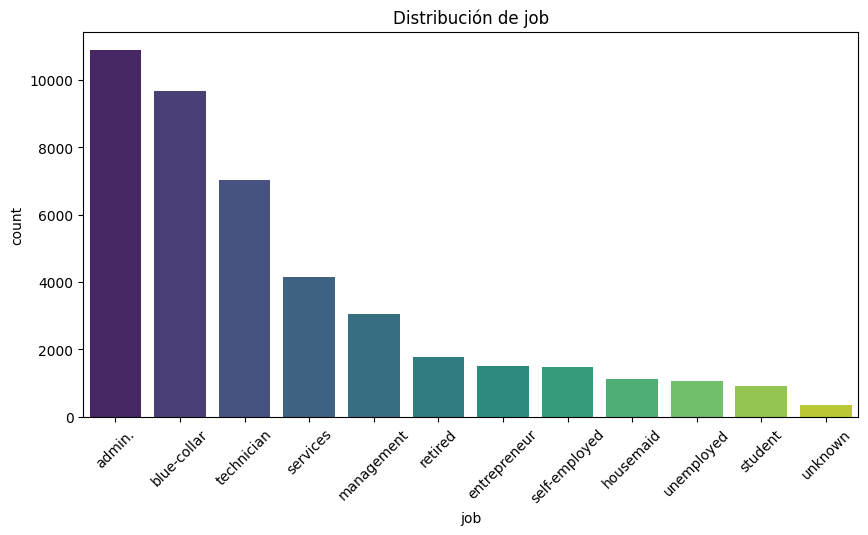

c:\Users\antonio\Desktop\EDA_Bank_Marketing_Analysis\jupyters\../src\sp_visualizacion.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis",


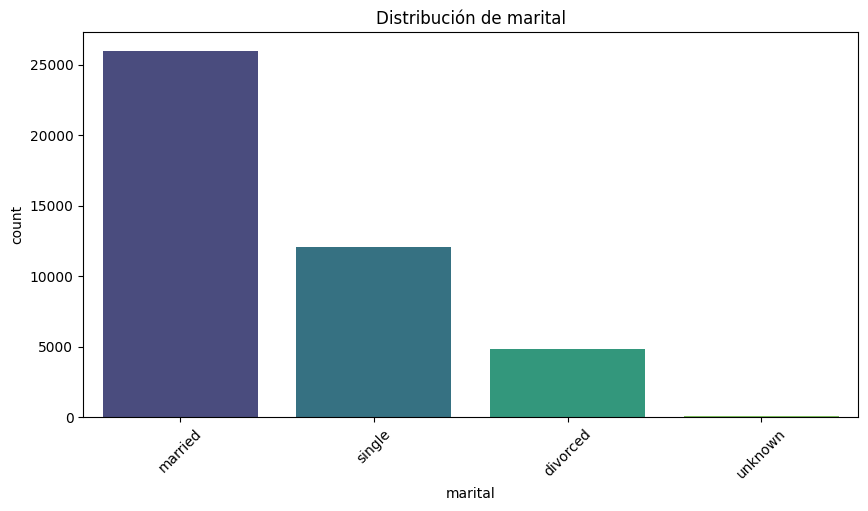

c:\Users\antonio\Desktop\EDA_Bank_Marketing_Analysis\jupyters\../src\sp_visualizacion.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis",


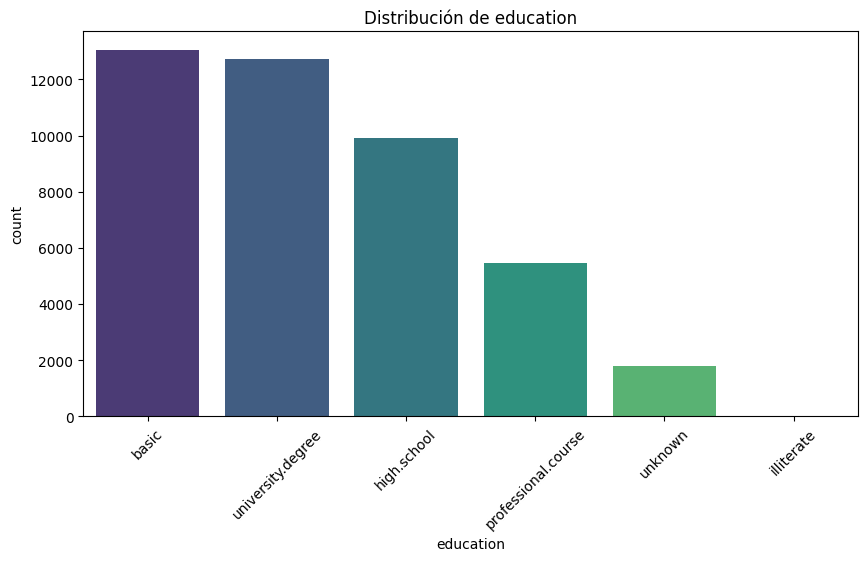

c:\Users\antonio\Desktop\EDA_Bank_Marketing_Analysis\jupyters\../src\sp_visualizacion.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis",


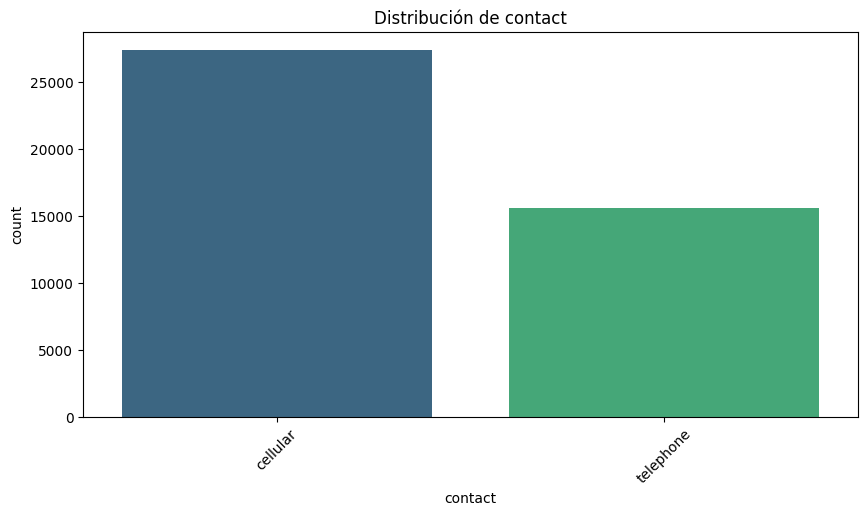

c:\Users\antonio\Desktop\EDA_Bank_Marketing_Analysis\jupyters\../src\sp_visualizacion.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis",


KeyboardInterrupt: 

In [14]:
graficar_categoricas(df_limpio)